In [429]:
# Import des librairies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split

In [430]:
# Options Pandas pour mieux voir les choses sous JupyterNotebook
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 1000)

# Lecture du jeu de données

In [431]:
df = pd.read_csv("recipeData.csv", sep=",", encoding="ISO-8859-1")
df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [432]:
df[df["SugarScale"] == "Plato"]

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
37,38,Brewdog Punk IPA clone,/homebrew/recipe/view/272331/brewdog-punk-ipa-...,American IPA,7,46.00,13.9618,3.48530,5.65,37.62,4.96,55.00,90,11.8,75.0,3.3,Plato,All Grain,1.00,18.00,Force carb,NaN,NaN
272,273,Hopworks IPA Clone,/homebrew/recipe/view/37331/hopworks-ipa-clone,American IPA,7,20.82,15.0428,3.75321,6.11,87.20,8.08,28.39,90,NaN,68.0,NaN,Plato,All Grain,1.25,18.89,CO2,10 psi,NaN
273,274,Porter,/homebrew/recipe/view/49964/porter,Brown Porter,37,21.00,13.1874,3.61072,5.15,29.06,22.65,26.00,75,NaN,80.0,NaN,Plato,All Grain,0.35,19.00,NaN,NaN,12772.0
418,419,Arrogant Bastard Clone,/homebrew/recipe/view/43960/arrogant-bastard-c...,Old Ale,116,22.71,16.6131,4.33412,6.70,90.07,17.08,28.39,90,NaN,70.0,NaN,Plato,All Grain,1.00,20.00,NaN,NaN,2938.0
419,420,Maris Otter Centennial SMaSH,/homebrew/recipe/view/27073/maris-otter-centen...,American IPA,7,20.82,15.4102,4.48111,5.94,69.27,6.66,28.39,60,NaN,70.0,NaN,Plato,All Grain,NaN,NaN,NaN,NaN,2938.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73589,73590,Blond Spa,/homebrew/recipe/view/613081/blond-spa,Belgian Blond Ale,20,13.00,15.6985,3.65251,6.54,21.38,5.94,15.00,70,13.7,75.0,3.0,Plato,All Grain,NaN,20.00,NaN,NaN,NaN
73590,73591,Tobedefined,/homebrew/recipe/view/617433/tobedefined,American IPA,7,17.00,14.4405,3.01395,6.16,40.09,7.83,25.00,60,10.0,65.0,5.0,Plato,All Grain,NaN,20.00,NaN,NaN,53006.0
73612,73613,Starter 1 5,/homebrew/recipe/view/615424/starter-1-5,American Light Lager,9,2.00,13.3425,3.45005,5.32,0.00,5.95,2.50,60,10.8,35.0,3.0,Plato,All Grain,NaN,NaN,NaN,NaN,NaN
73695,73696,IPA Father,/homebrew/recipe/view/616648/ipa-father,American IPA,7,530.00,15.1843,3.00776,6.58,44.41,4.27,610.00,60,13.3,78.0,3.0,Plato,All Grain,NaN,NaN,NaN,NaN,NaN


In [433]:
df[df["SugarScale"] == "Specific Gravity"]

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73856,73857,Amber Alfie 2,/homebrew/recipe/view/609673/amber-alfie-2,British Strong Ale,36,21.00,1.052,1.012,5.22,39.73,6.96,18.00,60,1.060,63.0,3.0,Specific Gravity,All Grain,1.25,20.00,NaN,NaN,59658.0
73857,73858,Rye IPA,/homebrew/recipe/view/610955/rye-ipa,Specialty IPA: Rye IPA,151,10.00,1.059,1.010,6.37,59.21,7.90,17.00,60,1.034,60.0,NaN,Specific Gravity,BIAB,0.50,22.00,NaN,NaN,NaN
73858,73859,SK-Kölsch,/homebrew/recipe/view/586891/,NaN,111,16.00,1.046,1.008,5.01,25.42,3.63,18.00,90,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,17.00,sucrose,140 g,82450.0
73859,73860,Flata Rødkløver,/homebrew/recipe/view/603788/,Irish Red Ale,92,24.00,1.051,1.014,4.82,25.65,14.12,28.00,60,1.043,72.0,NaN,Specific Gravity,All Grain,NaN,18.00,Sukkerlake,5 g sukker/l,NaN


In [434]:
df.shape

(73861, 23)

# Description des données

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73860 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

In [436]:
df.describe()

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,34609.000000,51199.000000,23371.000000
mean,36931.000000,60.179432,43.929775,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,0.750468,19.175641,43078.069188
std,21321.978453,56.811462,180.373492,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,0.394262,4.219676,27734.252556
min,1.000000,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,49.000000
25%,18466.000000,10.000000,18.930000,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,0.350000,18.000000,20984.000000
50%,36931.000000,35.000000,20.820000,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,0.750000,20.000000,42897.000000
75%,55396.000000,111.000000,23.660000,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,1.000000,20.000000,57841.000000
max,73861.000000,176.000000,9200.000000,34.034500,23.424600,54.720000,3409.300000,186.000000,9700.000000,240.000000,52.600000,100.000000,100.000000,2.000000,114.000000,134362.000000


<Axes: >

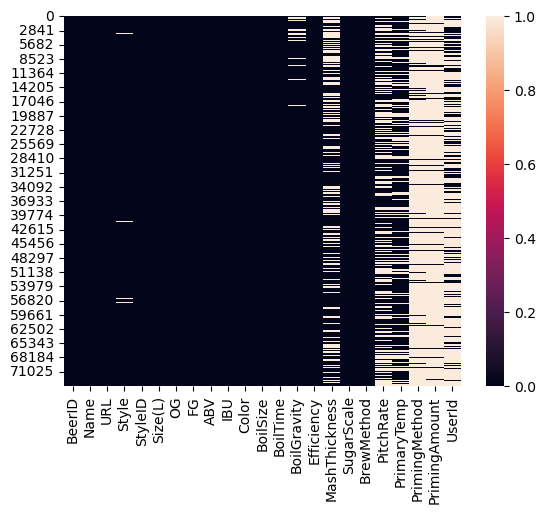

In [437]:
# Heatmap des valeurs manquantes
sns.heatmap(df.isnull(), cbar="False")

C'est un jeu de données plutôt bien renseigné, mais nous devrons certainement supprimer certaines colonnes trop peu remplies.

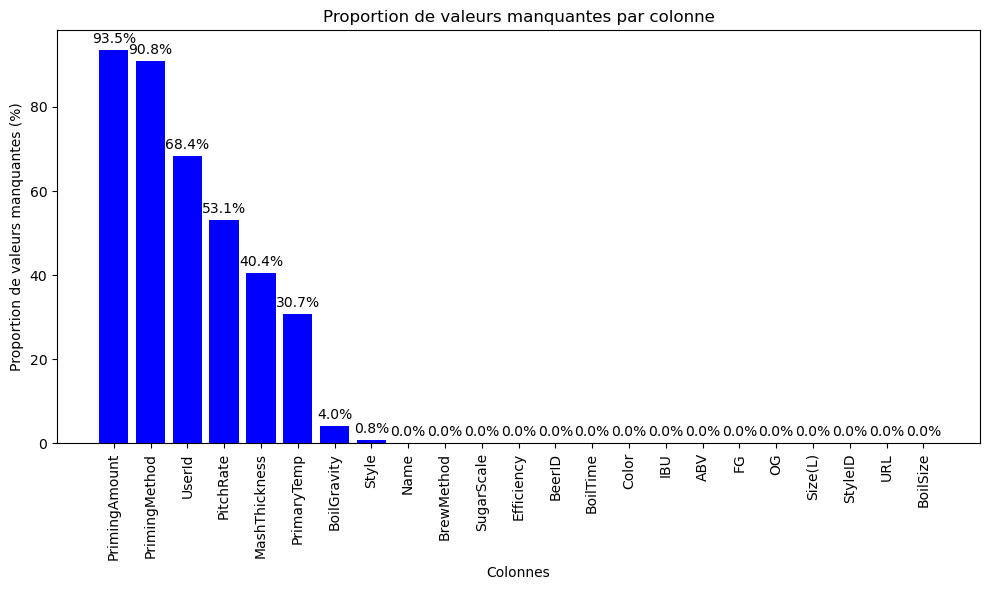

In [438]:
# Calculer la proportion de valeurs manquantes par colonne
missing_data = df.isnull().mean()

# Trier les colonnes par ordre décroissant de proportion de valeurs manquantes
missing_data = missing_data.sort_values(ascending=False)

# Tracer le graphique

plt.figure(figsize=(10, 6))

bars = plt.bar(missing_data.index, missing_data * 100, color="blue")
plt.bar(missing_data.index, missing_data * 100, color="blue")

plt.title("Proportion de valeurs manquantes par colonne")
plt.xlabel("Colonnes")
plt.ylabel("Proportion de valeurs manquantes (%)")
plt.xticks(rotation=90)

for bar, proportion in zip(bars, missing_data):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f"{proportion:.1%}",
        ha="center",
        va="bottom",
    )

plt.tight_layout()
plt.show()

Nous supprimerons les variables PrimingAmount, PrimingMethod, UserID, PitchRate et Mash Thickness dans un premier temps, nous échangerons avec les maitres brasseurs pour essayer de mieux comprendre ces données et la difficulté de leurs mesures.

# Analyses exploratoires

#### Variables quantitatives

In [439]:
# Isolement des variables quantitatives pour regarder leur distribution
df_num = df.select_dtypes(include=["int64", "float64"])
df_num

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
0,1,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,NaN,17.78,116.0
1,2,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,NaN,NaN,955.0
2,3,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,NaN,NaN,NaN
3,4,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,NaN,NaN,NaN
4,5,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,NaN,19.00,18325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73856,73857,36,21.00,1.052,1.012,5.22,39.73,6.96,18.00,60,1.060,63.0,3.0,1.25,20.00,59658.0
73857,73858,151,10.00,1.059,1.010,6.37,59.21,7.90,17.00,60,1.034,60.0,NaN,0.50,22.00,NaN
73858,73859,111,16.00,1.046,1.008,5.01,25.42,3.63,18.00,90,1.041,65.0,NaN,0.35,17.00,82450.0
73859,73860,92,24.00,1.051,1.014,4.82,25.65,14.12,28.00,60,1.043,72.0,NaN,NaN,18.00,NaN


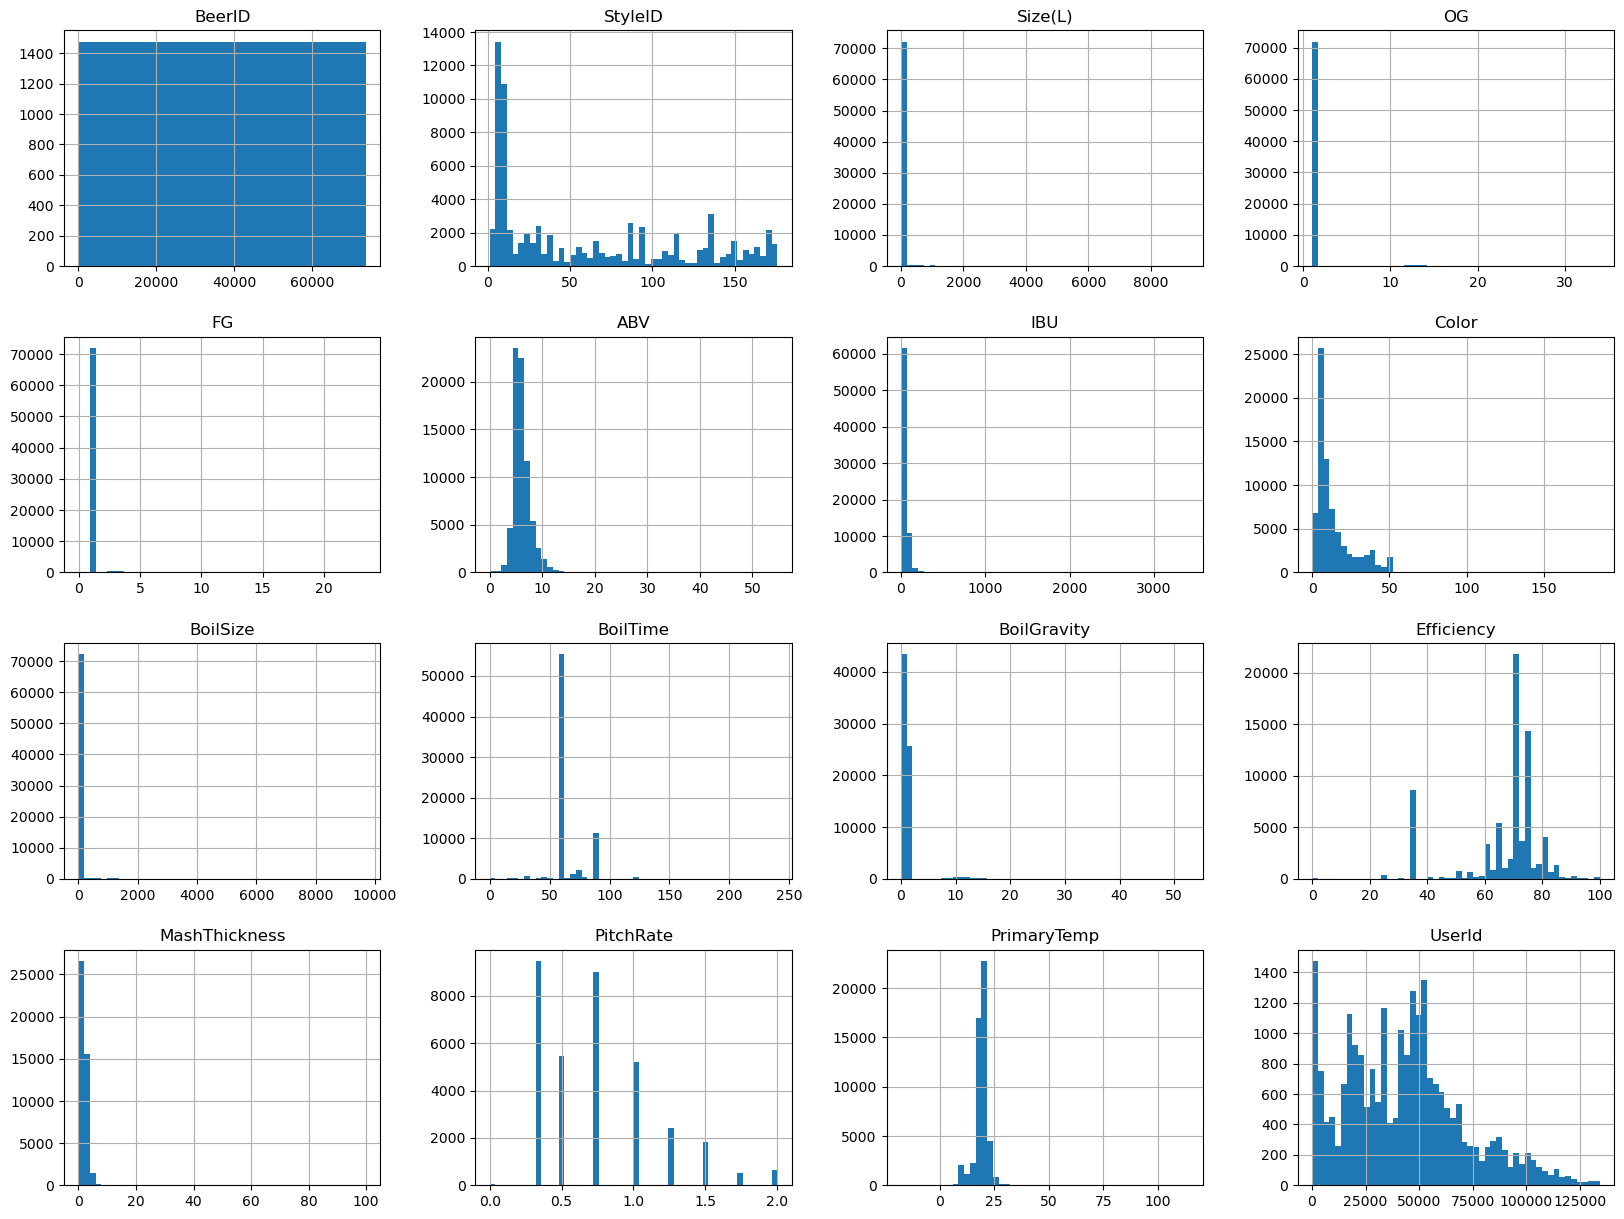

In [440]:
# Visualisations sous la forme d'histogrammes

df_num.hist(bins=50, figsize=(20, 15))

plt.show()

<Figure size 2000x1500 with 0 Axes>

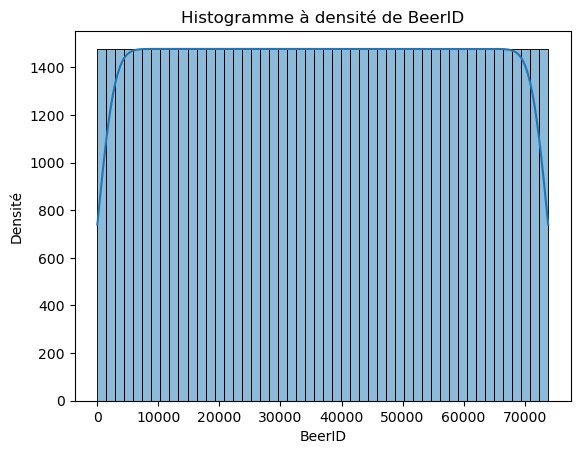

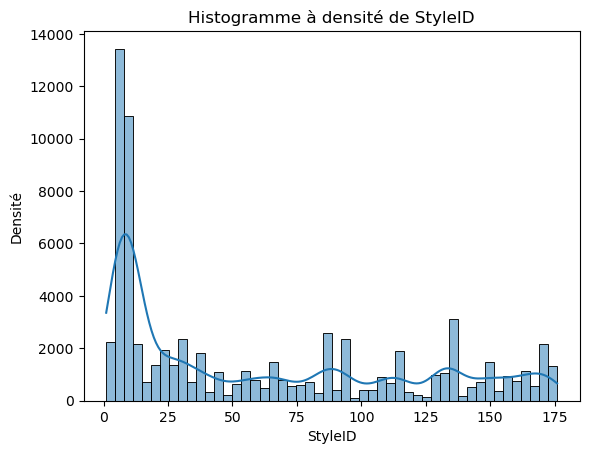

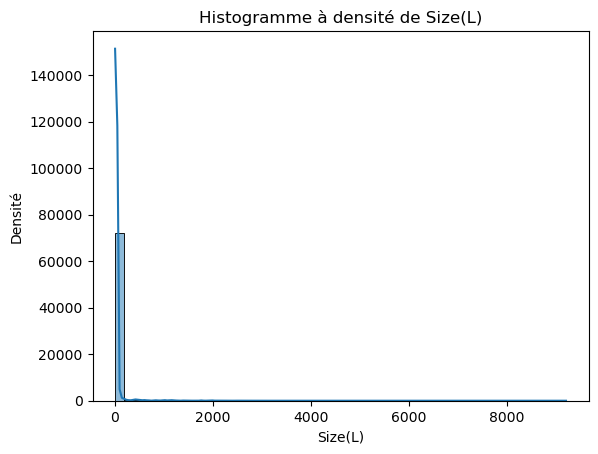

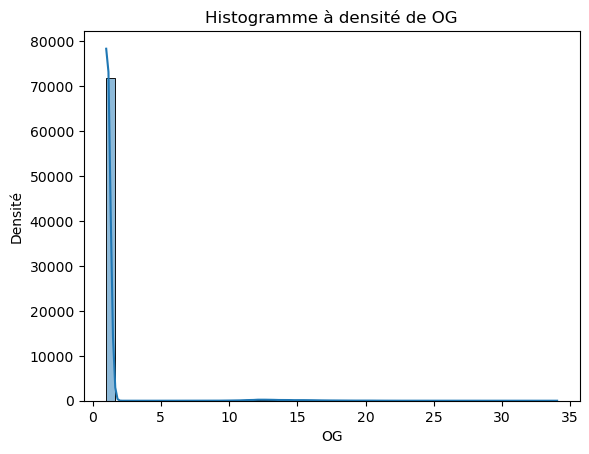

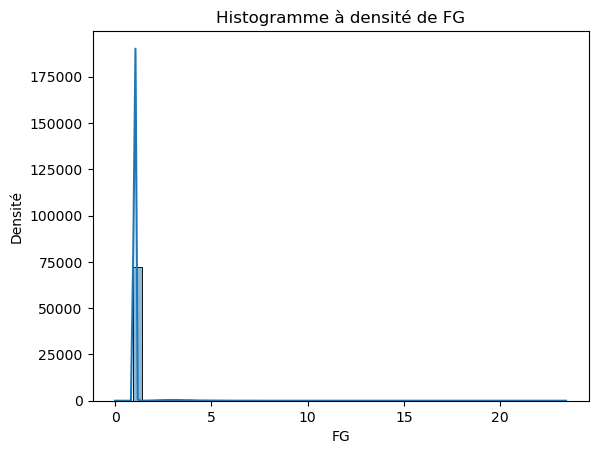

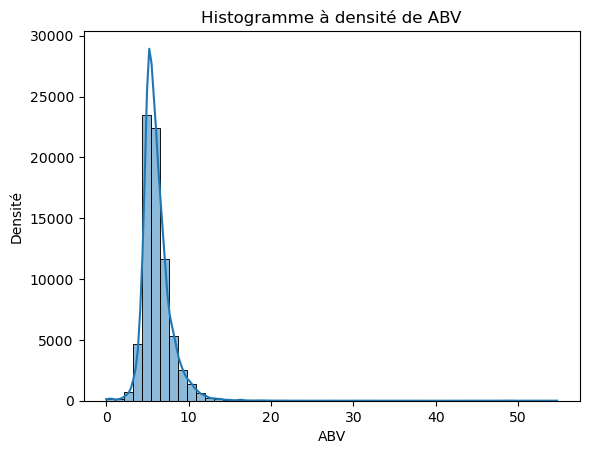

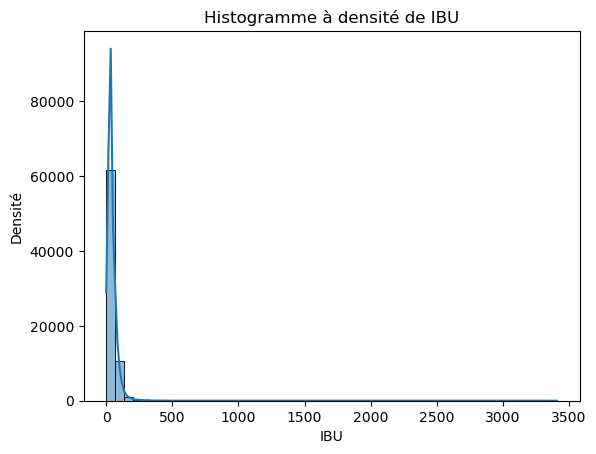

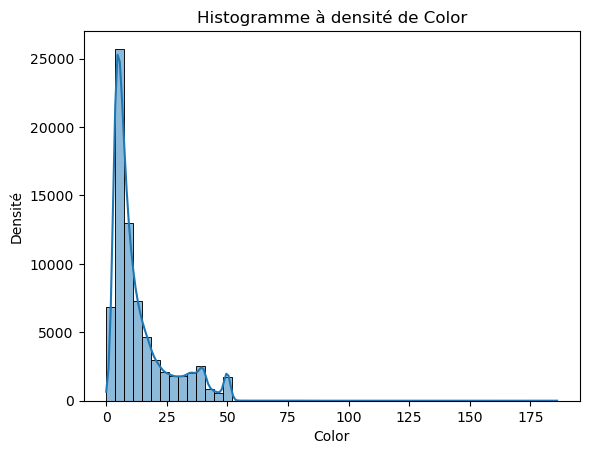

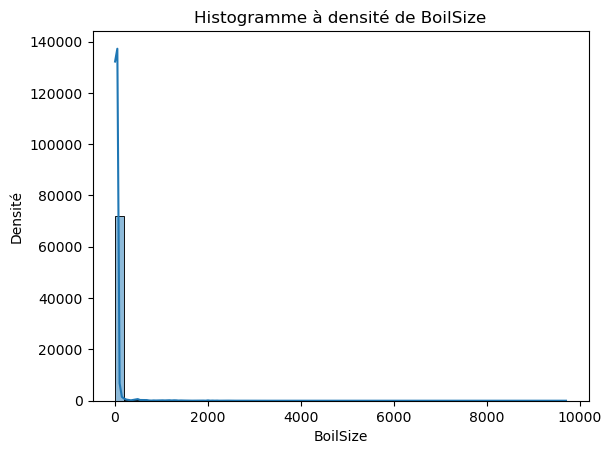

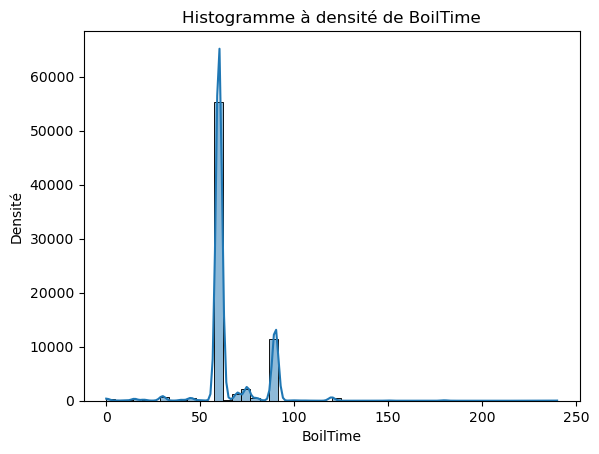

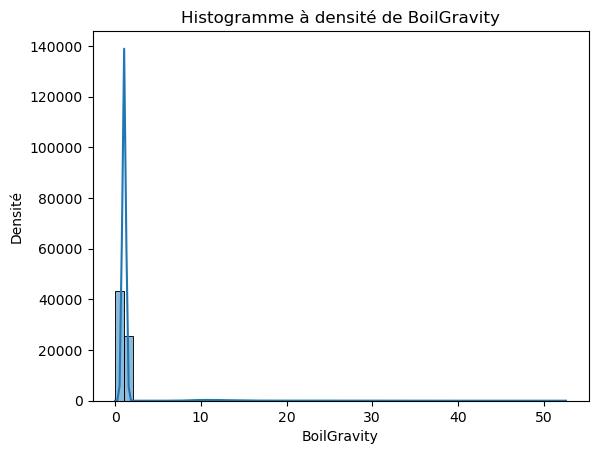

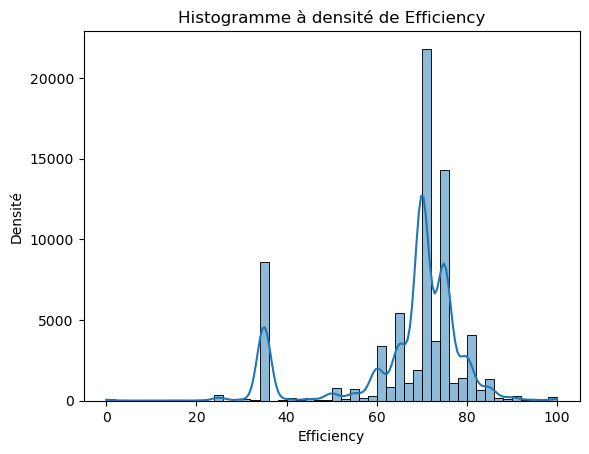

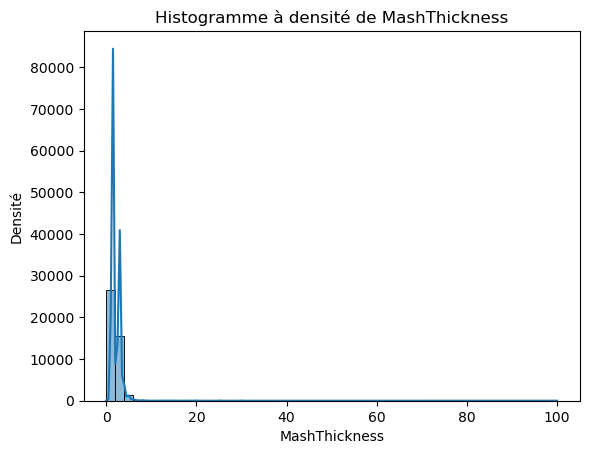

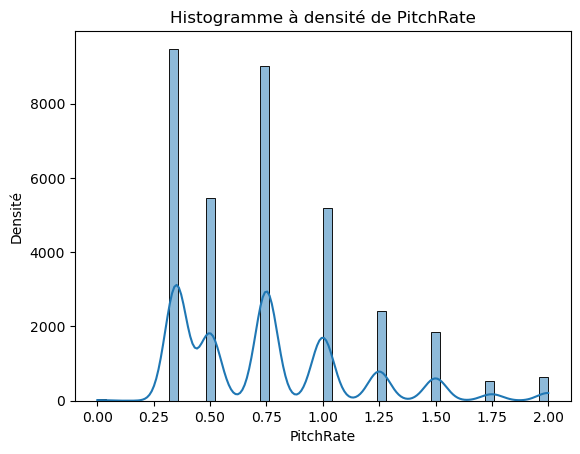

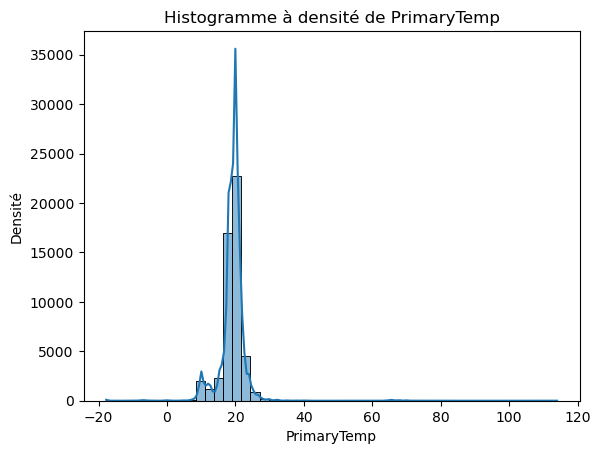

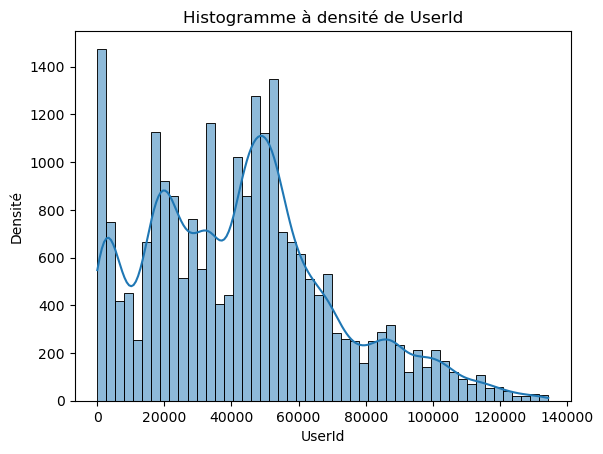

In [441]:
# Même chose mais individuellement
plt.figure(figsize=(20, 15))

# Parcourir chaque colonne numérique dans le DataFrame
for col in df_num.columns:
    plt.figure()
    sns.histplot(data=df_num, x=col, bins=50, kde=True)
    plt.title(f"Histogramme à densité de {col}")
    plt.xlabel(col)
    plt.ylabel("Densité")
    plt.show()

<Figure size 2000x1500 with 0 Axes>

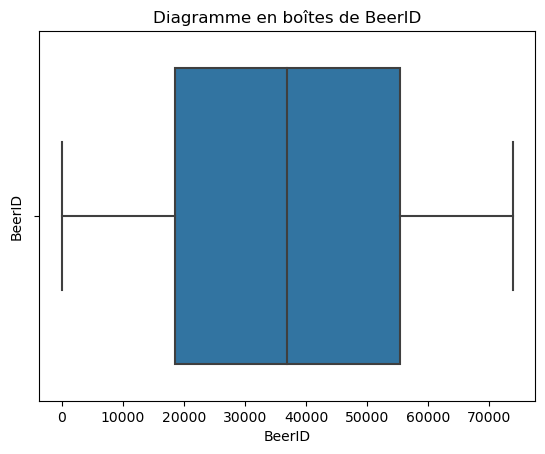

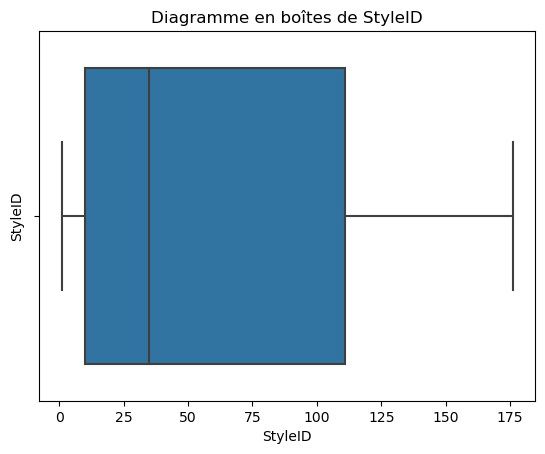

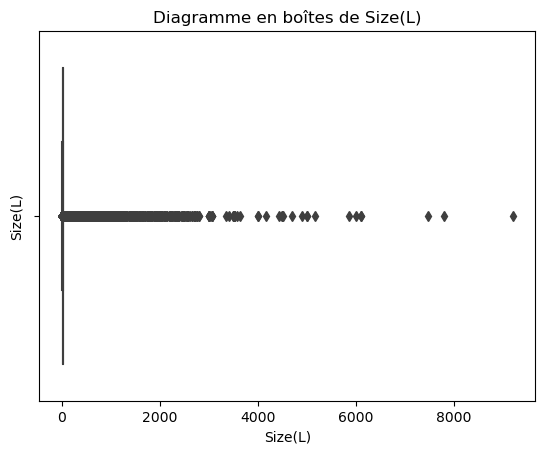

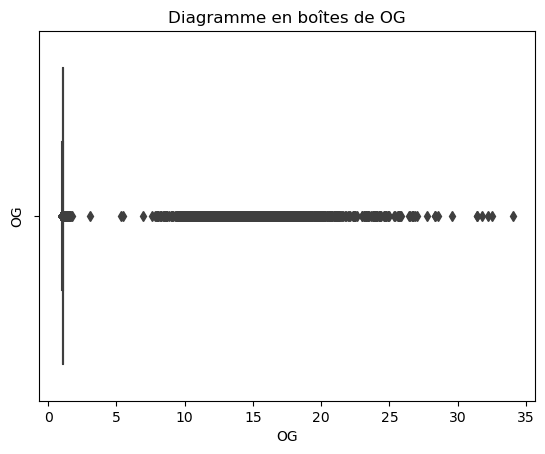

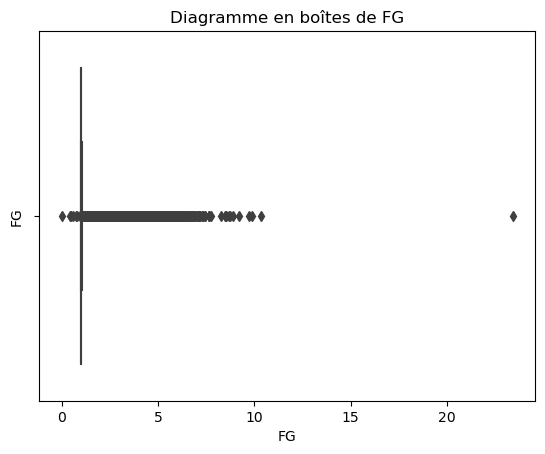

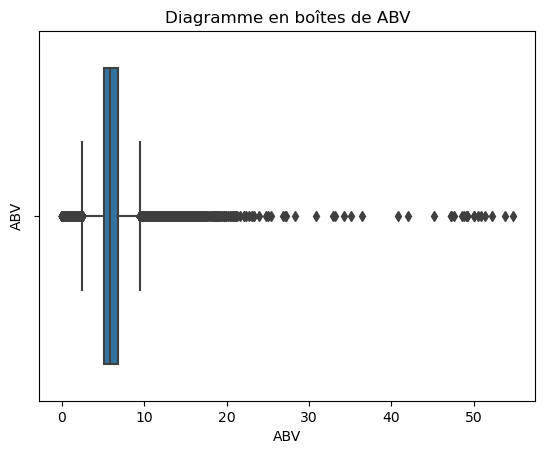

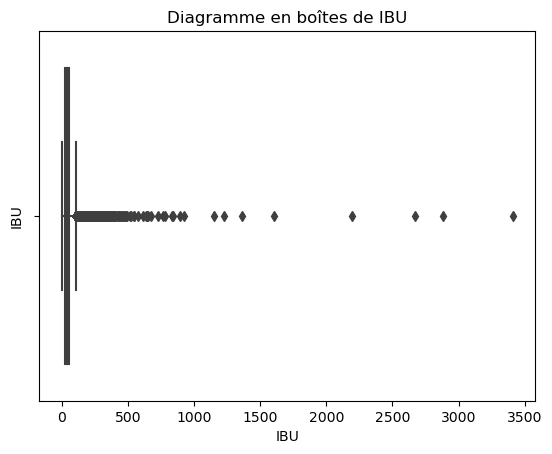

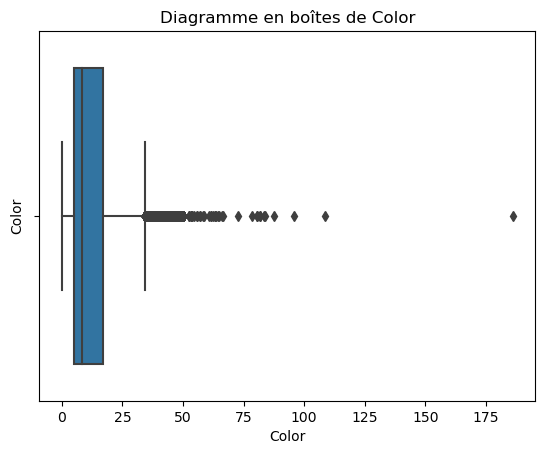

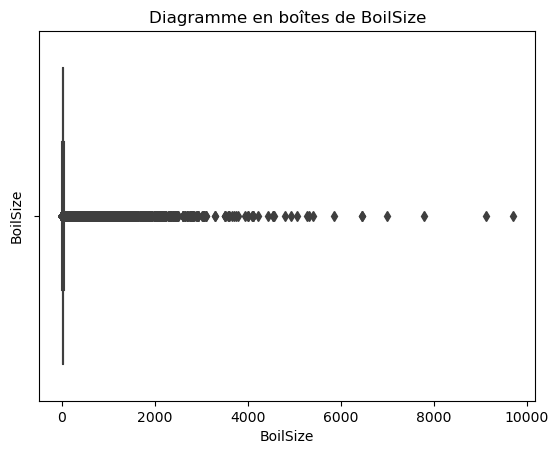

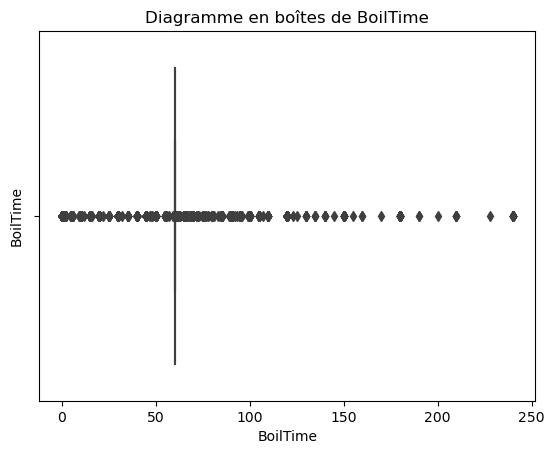

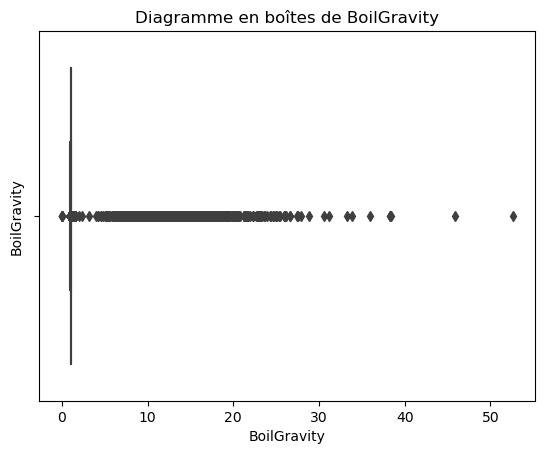

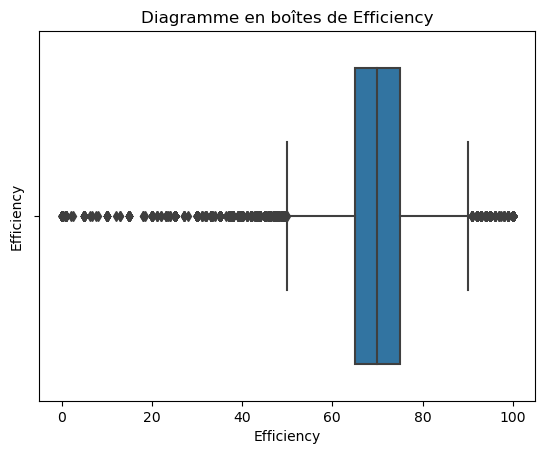

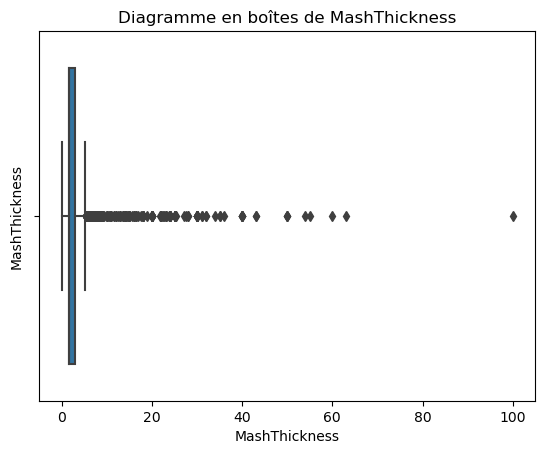

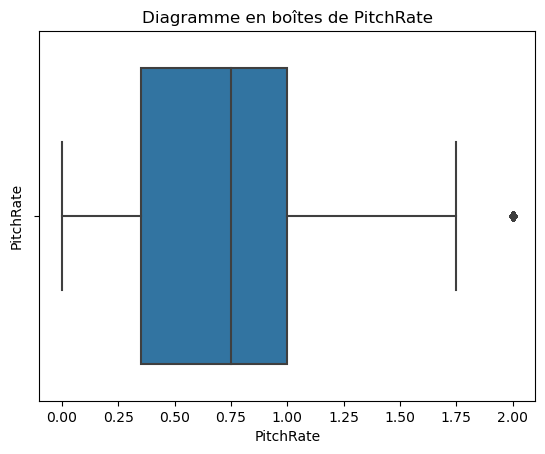

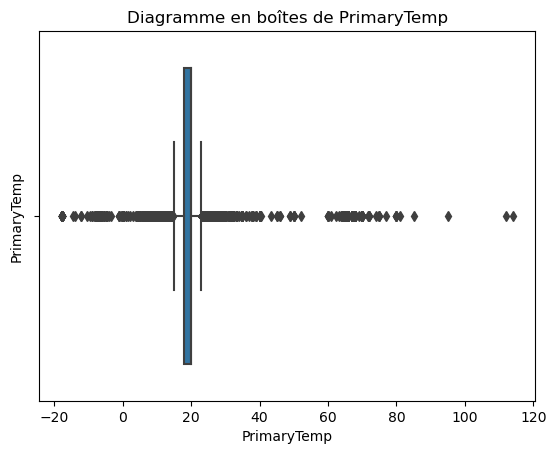

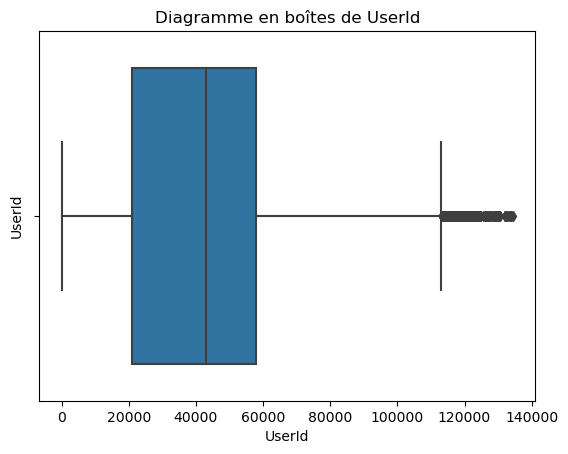

In [442]:
# Sous la forme de boîtes à moustaches

plt.figure(figsize=(20, 15))

for col in df_num.columns:
    plt.figure()
    sns.boxplot(data=df_num, x=col, orient="h")
    plt.title(f"Diagramme en boîtes de {col}")
    plt.ylabel(col)
    plt.show()

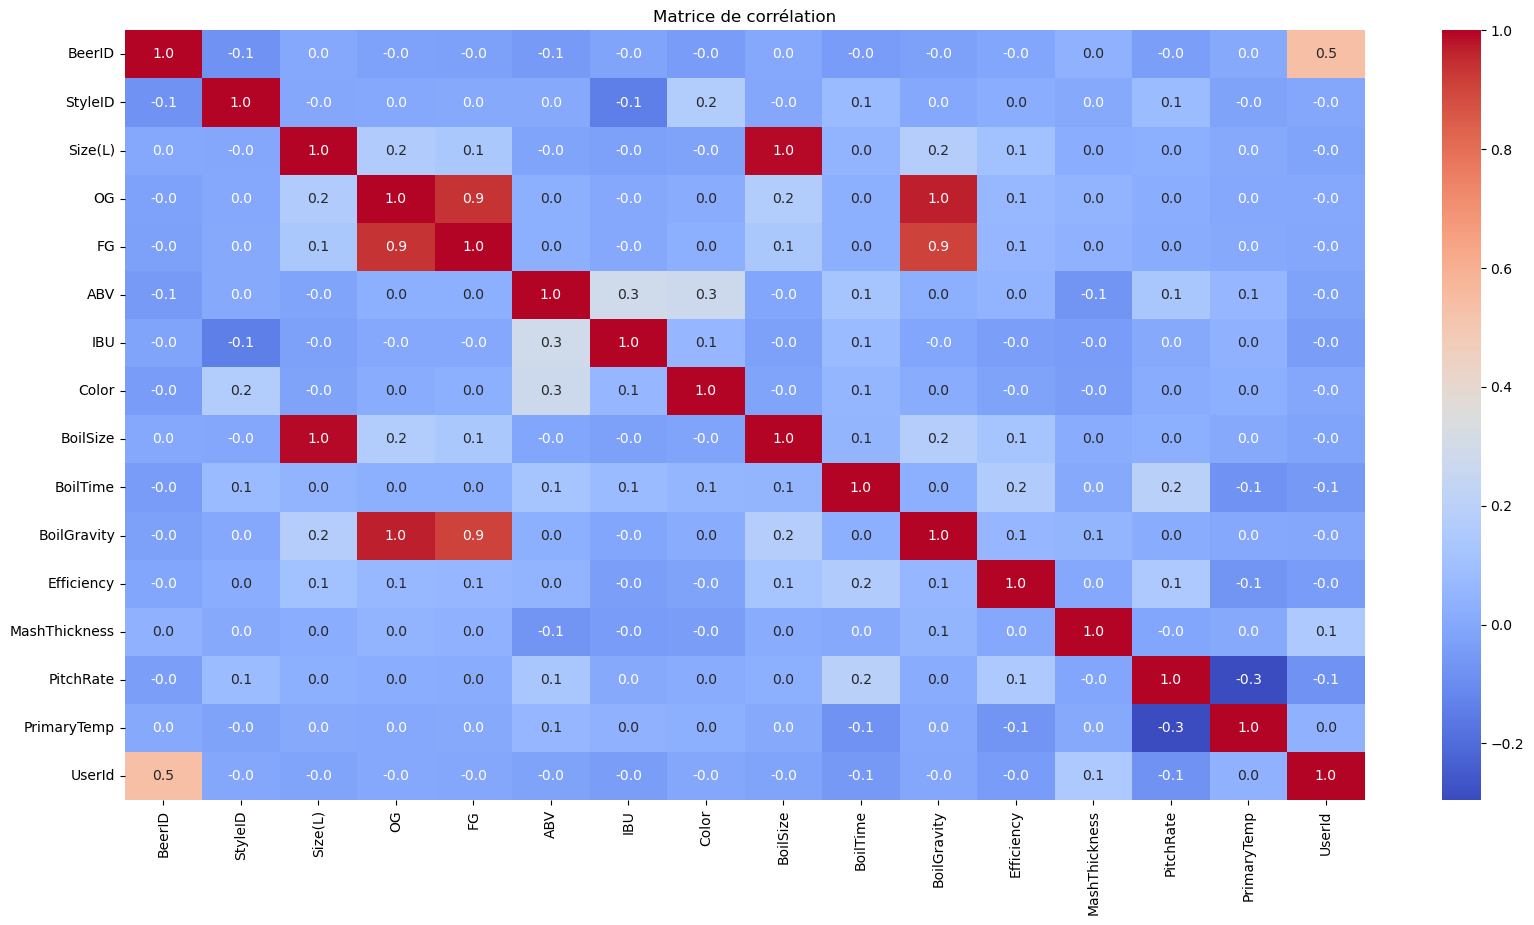

In [443]:
# Etude des correlations entre les variables de notre jeu de données :

# Calculer la matrice de corrélation avec les variables quantitatives uniquement
correlation_matrix = df_num.corr()

# Afficher la matrice de corrélation avec une heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm")

# affichage de la matrice de corrélation
plt.title("Matrice de corrélation")
plt.show()

On remarque que BoilSize est complètement corrélé au Volume du Brassin, nous créerons une nouvelle variable à partir de ces deux là : Le volume d'eau en L utilisé pour fabriquer un litre de bière.

BoilGravity est quasiment complétement correlé à FG et OG, nous ne la conserverons donc pas dans nos analyses.

FG et OG sont complètement corrélées, nous créerons une variable à partir de ces deux là dans la partie Feature Engineering qui sera FG - OG correspondant à la différence de densité entre le moût après fermentation et avant fermentation, en unités de densité.

### Corrélation entre nos targets et le reste des variables quantitatives

In [444]:
df_num.corr()["IBU"].sort_values(ascending=False)

IBU              1.000000
ABV              0.290889
BoilTime         0.078694
Color            0.060283
PrimaryTemp      0.035510
PitchRate        0.006180
FG              -0.000719
OG              -0.001655
BoilGravity     -0.007498
BeerID          -0.015845
BoilSize        -0.028258
Size(L)         -0.029917
Efficiency      -0.033172
UserId          -0.040685
MashThickness   -0.044381
StyleID         -0.141124
Name: IBU, dtype: float64

Aucune variable n'est trop fortement corrélée à l'amertume.

In [445]:
df_num.corr()["ABV"].sort_values(ascending=False)

ABV              1.000000
IBU              0.290889
Color            0.271332
PitchRate        0.132699
BoilTime         0.120629
PrimaryTemp      0.060065
Efficiency       0.047853
OG               0.029432
FG               0.026851
BoilGravity      0.025421
StyleID          0.006617
BoilSize        -0.009800
Size(L)         -0.013527
UserId          -0.019513
BeerID          -0.051921
MashThickness   -0.069633
Name: ABV, dtype: float64

Aucune variable n'est trop fortement corrélée au degré d'alcool.

#### Variables qualitatives

In [446]:
# Isolement des variables quantitatives pour regarder les liens qu'elles ont avec les variables quantitatives
# ainsi qu'entre elles
df_cat = df.select_dtypes(exclude=["int64", "float64"])
df_cat

,Name,URL,Style,SugarScale,BrewMethod,PrimingMethod,PrimingAmount
0,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,Specific Gravity,All Grain,corn sugar,4.5 oz
1,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,Specific Gravity,All Grain,NaN,NaN
2,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,Specific Gravity,extract,NaN,NaN
3,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,Specific Gravity,All Grain,NaN,NaN
4,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,Specific Gravity,All Grain,Sukkerlake,6-7 g sukker/l
...,...,...,...,...,...,...,...
73856,Amber Alfie 2,/homebrew/recipe/view/609673/amber-alfie-2,British Strong Ale,Specific Gravity,All Grain,NaN,NaN
73857,Rye IPA,/homebrew/recipe/view/610955/rye-ipa,Specialty IPA: Rye IPA,Specific Gravity,BIAB,NaN,NaN
73858,SK-Kölsch,/homebrew/recipe/view/586891/,NaN,Specific Gravity,BIAB,sucrose,140 g
73859,Flata Rødkløver,/homebrew/recipe/view/603788/,Irish Red Ale,Specific Gravity,All Grain,Sukkerlake,5 g sukker/l


In [447]:
df_cat["Style"].value_counts()

American IPA                          11940
American Pale Ale                      7581
Saison                                 2617
American Light Lager                   2277
American Amber Ale                     2038
Blonde Ale                             1753
Imperial IPA                           1478
American Stout                         1268
Irish Red Ale                          1204
American Brown Ale                     1152
Witbier                                1072
California Common Beer                 1044
Weissbier                               988
Oatmeal Stout                           961
Russian Imperial Stout                  929
Weizen/Weissbier                        919
Sweet Stout                             919
Robust Porter                           897
Kölsch                                  869
Double IPA                              864
Cream Ale                               830
American Porter                         787
English IPA                     

In [448]:
df_cat["SugarScale"].value_counts()

Specific Gravity    71959
Plato                1902
Name: SugarScale, dtype: int64

Cette variable sera encodée via LabelBinarizer

In [449]:
df_cat["BrewMethod"].value_counts()

All Grain       49692
BIAB            12016
extract          8626
Partial Mash     3527
Name: BrewMethod, dtype: int64

Nous encoderons ici via OneHotEncoder

In [450]:
df["PrimingMethod"].value_counts()

Corn Sugar                                                 715
Dextrose                                                   503
corn sugar                                                 360
Keg                                                        330
Sugar                                                      312
Sukkerlake                                                 310
dextrose                                                   246
Corn sugar                                                 220
CO2                                                        185
sugar                                                      162
Force Carb                                                 125
Table Sugar                                                113
keg                                                         96
Forced                                                      92
DME                                                         92
Table sugar                                            

In [451]:
df["PrimingMethod"].value_counts().shape

(874,)

Nous supprimerons cette colonne très mal référencée, et qui nécéssite un traitement un peu trop long pour être exploitable. Cela fera l'objet de discussions avec notre client, pour affiner nos prédictions. Il nous faudrait translittérer, uppercaser et tout traduire en anglais pour obtenir quelque chose d'exploitable. Il y a 874 valeurs différentes pour cette variable.

In [452]:
df["PrimingAmount"].value_counts()

5 oz                    205
3/4 cup                 110
4 oz                    106
1 cup                   102
5oz                      92
                       ... 
.75 ounce per gallon      1
6 grams per liter         1
0.75 cups                 1
6 5g/L                    1
7 gram / liter            1
Name: PrimingAmount, Length: 1896, dtype: int64

Même commentaire pour cette variable, il faudrait uniformiser les unités de concentration et recenser des nombres.

### Test ANOVA entre nos variables cibles et nos variables catégorielles

In [453]:
targets = ["ABV", "IBU"]

# Variables catégorielles
liste_cat = ["Style", "SugarScale", "BrewMethod"]

for target in targets:
    print(f"Analyse de variance pour la variable cible: {target}\n")

    for cat in liste_cat:
        print(f"Variable catégorielle: {cat}")

        # Séparer les groupes en fonction de la variable catégorielle
        groupes = []
        for group_name, data in df.groupby(df[cat]):
            groupes.append(data[target])

        # Effectuer le test ANOVA
        f_statistic, p_value = stats.f_oneway(*groupes)

        print(f"Statistique F: {f_statistic:.2f}")
        print(f"Valeur p: {p_value:.4f}")

        # Interpréter le résultat

        if p_value < 0.05:
            print(
                "Rejet de l'hypothèse nulle : Il y a des différences significatives entre les groupes."
            )
        else:
            print(
                "Échec de rejeter l'hypothèse nulle : Aucune différence significative entre les groupes."
            )
        print("-----------------------------------------")
    print("\n=========================================\n")

Analyse de variance pour la variable cible: ABV

Variable catégorielle: Style
Statistique F: 299.68
Valeur p: 0.0000
Rejet de l'hypothèse nulle : Il y a des différences significatives entre les groupes.
-----------------------------------------
Variable catégorielle: SugarScale
Statistique F: 10.21
Valeur p: 0.0014
Rejet de l'hypothèse nulle : Il y a des différences significatives entre les groupes.
-----------------------------------------
Variable catégorielle: BrewMethod
Statistique F: 25.73
Valeur p: 0.0000
Rejet de l'hypothèse nulle : Il y a des différences significatives entre les groupes.
-----------------------------------------


Analyse de variance pour la variable cible: IBU

Variable catégorielle: Style
Statistique F: 171.67
Valeur p: 0.0000
Rejet de l'hypothèse nulle : Il y a des différences significatives entre les groupes.
-----------------------------------------
Variable catégorielle: SugarScale
Statistique F: 16.59
Valeur p: 0.0000
Rejet de l'hypothèse nulle : Il y a 

Ces résultats sont à relativiser car il faut vérifier si les les distributions et les variances des données dans chaque groupe sont à peu près similaires. 

La méthode de brassage ne semble pas influer sur l'Amertume d'une bière.

# Nettoyage du jeu de données, conformément à nos analyses

In [454]:
df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


#### Suppression des variables trop peu renseignées (seuil à 40% de valeurs manquantes)

In [455]:
df = df.drop(
    ["PrimingAmount", "PrimingMethod", "UserId", "PitchRate", "MashThickness"], axis=1
)

In [456]:
df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,PrimaryTemp
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,Specific Gravity,All Grain,17.78
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,Specific Gravity,All Grain,NaN
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,Specific Gravity,extract,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,Specific Gravity,All Grain,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,Specific Gravity,All Grain,19.00


#### Suppression des variables qui n'ont pas de sens pour notre problématique

In [457]:
df = df.drop(["BeerID", "Name", "URL", "StyleID"], axis=1)

In [458]:
df.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,PrimaryTemp
0,Cream Ale,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,Specific Gravity,All Grain,17.78
1,Holiday/Winter Special Spiced Beer,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,Specific Gravity,All Grain,NaN
2,American IPA,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,Specific Gravity,extract,NaN
3,American IPA,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,Specific Gravity,All Grain,NaN
4,Belgian Blond Ale,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,Specific Gravity,All Grain,19.00


#### Suppression de la variable BoilGravity, qui a une corrélation linéaire quasi-parfaite avec OG et FG

In [459]:
df = df.drop(["BoilGravity"], axis=1)

#### Suppression des doublons

In [460]:
df.shape

(73861, 13)

In [461]:
df = df.drop_duplicates()

In [462]:
df.shape

(73603, 13)

In [463]:
df = df.reset_index(drop=True)

Nous avions ici 257 doublons.

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73603 entries, 0 to 73602
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Style        73023 non-null  object 
 1   Size(L)      73603 non-null  float64
 2   OG           73603 non-null  float64
 3   FG           73603 non-null  float64
 4   ABV          73603 non-null  float64
 5   IBU          73603 non-null  float64
 6   Color        73603 non-null  float64
 7   BoilSize     73603 non-null  float64
 8   BoilTime     73603 non-null  int64  
 9   Efficiency   73603 non-null  float64
 10  SugarScale   73603 non-null  object 
 11  BrewMethod   73603 non-null  object 
 12  PrimaryTemp  51040 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 7.3+ MB


#### Suppression des recettes dont le Style n'est pas recensé

In [465]:
df = df.dropna(subset=["Style"]).reset_index(drop=True)

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73023 entries, 0 to 73022
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Style        73023 non-null  object 
 1   Size(L)      73023 non-null  float64
 2   OG           73023 non-null  float64
 3   FG           73023 non-null  float64
 4   ABV          73023 non-null  float64
 5   IBU          73023 non-null  float64
 6   Color        73023 non-null  float64
 7   BoilSize     73023 non-null  float64
 8   BoilTime     73023 non-null  int64  
 9   Efficiency   73023 non-null  float64
 10  SugarScale   73023 non-null  object 
 11  BrewMethod   73023 non-null  object 
 12  PrimaryTemp  50810 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 7.2+ MB


In [467]:
df.describe()

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,PrimaryTemp
count,73023.000000,73023.000000,73023.000000,73023.000000,73023.000000,73023.000000,73023.000000,73023.000000,73023.000000,50810.000000
mean,44.052409,1.405901,1.075547,6.139124,44.395592,13.400027,49.863972,65.094915,66.332204,19.177728
std,180.796727,2.197064,0.424840,1.873766,41.625315,11.931641,193.613191,15.011348,14.096167,4.221632
min,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-17.780000
25%,18.930000,1.051000,1.011000,5.080000,23.500000,5.170000,20.820000,60.000000,65.000000,18.000000
50%,20.820000,1.058000,1.013000,5.790000,35.880000,8.430000,27.440000,60.000000,70.000000,20.000000
75%,23.660000,1.069000,1.017000,6.830000,56.490000,16.770000,30.000000,60.000000,75.000000,20.000000
max,9200.000000,34.034500,10.341400,54.720000,3409.300000,186.000000,9700.000000,240.000000,100.000000,114.000000


#### Suppression des individus contenant des valeurs aberrantes par l'application de filtres

In [468]:
# Une temperature de début de fermentation ne peut pas être négative (on conserve les NaN pour imputer plus tard)

df = df.loc[(df["PrimaryTemp"].isnull()) | (df["PrimaryTemp"] > 0)]

In [469]:
# La densité du moût après fermentation ne peut pas être négative

df = df[df["FG"] > 0]

In [470]:
df.shape

(72897, 13)

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72897 entries, 0 to 73022
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Style        72897 non-null  object 
 1   Size(L)      72897 non-null  float64
 2   OG           72897 non-null  float64
 3   FG           72897 non-null  float64
 4   ABV          72897 non-null  float64
 5   IBU          72897 non-null  float64
 6   Color        72897 non-null  float64
 7   BoilSize     72897 non-null  float64
 8   BoilTime     72897 non-null  int64  
 9   Efficiency   72897 non-null  float64
 10  SugarScale   72897 non-null  object 
 11  BrewMethod   72897 non-null  object 
 12  PrimaryTemp  50684 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 7.8+ MB


In [472]:
df = df.reset_index(drop=True)

# Feature Engineering conforme aux analyses exploratoires

Nous souhaitons effectuer une classification concernant l'amertume des bières, conformément aux exigences du milieu :

IBU < 20 : peu d’amertume     -      0

IBU 20 à 40 : amertume modérée    -  1

IBU 40 à 60 : amertume prononcée  -  2

IBU 60 à 80 : amertume intense    -  3

IBU > 80 : amertume très intense   - 4


Source : https://unepetitemousse.fr/blog/biere-amere/

In [473]:
for index, row in df.iterrows():

    val = row["IBU"]

    if val < 20:

        df.loc[index, "IBU_LABEL"] = 0

    elif val >= 20 and val < 40:

        df.loc[index, "IBU_LABEL"] = 1

    elif val >= 40 and val < 60:

        df.loc[index, "IBU_LABEL"] = 2
    elif val >= 60 and val < 80:

        df.loc[index, "IBU_LABEL"] = 3

    else:

        df.loc[index, "IBU_LABEL"] = 4

In [474]:
# Conversion de la colonne en int

df["IBU_LABEL"] = df["IBU_LABEL"].astype(int)

In [475]:
df = df.drop(["IBU"], axis=1)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72897 entries, 0 to 72896
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Style        72897 non-null  object 
 1   Size(L)      72897 non-null  float64
 2   OG           72897 non-null  float64
 3   FG           72897 non-null  float64
 4   ABV          72897 non-null  float64
 5   Color        72897 non-null  float64
 6   BoilSize     72897 non-null  float64
 7   BoilTime     72897 non-null  int64  
 8   Efficiency   72897 non-null  float64
 9   SugarScale   72897 non-null  object 
 10  BrewMethod   72897 non-null  object 
 11  PrimaryTemp  50684 non-null  float64
 12  IBU_LABEL    72897 non-null  int32  
dtypes: float64(8), int32(1), int64(1), object(3)
memory usage: 7.0+ MB


Pour la suite, nous créeons des variables à partir de deux variables fortement corrélées linéairement et qui font plus sens que les variables initiales compte tenu de notre problématique

In [477]:
# Création d'une variable correspondant à la différence de densité du moût entre le début et la fin de la fermentation

df["diff_densite_fermentation"] = df["FG"] - df["OG"]

In [478]:
# Suppression des variables 'FG' et 'OG'

df = df.drop(["FG", "OG"], axis=1)

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72897 entries, 0 to 72896
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Style                      72897 non-null  object 
 1   Size(L)                    72897 non-null  float64
 2   ABV                        72897 non-null  float64
 3   Color                      72897 non-null  float64
 4   BoilSize                   72897 non-null  float64
 5   BoilTime                   72897 non-null  int64  
 6   Efficiency                 72897 non-null  float64
 7   SugarScale                 72897 non-null  object 
 8   BrewMethod                 72897 non-null  object 
 9   PrimaryTemp                50684 non-null  float64
 10  IBU_LABEL                  72897 non-null  int32  
 11  diff_densite_fermentation  72897 non-null  float64
dtypes: float64(7), int32(1), int64(1), object(3)
memory usage: 6.4+ MB


In [480]:
# Création d'une variable correspondant à la quantité d'eau utilisée pour l'ébulition du moût par litre de bière brassée

df["qte_eau_litre_biere"] = df["BoilSize"] / df["Size(L)"]

In [481]:
# Suppression des variables 'BoilSize' et 'Size(L)'

df = df.drop(["BoilSize", "Size(L)"], axis=1)

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72897 entries, 0 to 72896
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Style                      72897 non-null  object 
 1   ABV                        72897 non-null  float64
 2   Color                      72897 non-null  float64
 3   BoilTime                   72897 non-null  int64  
 4   Efficiency                 72897 non-null  float64
 5   SugarScale                 72897 non-null  object 
 6   BrewMethod                 72897 non-null  object 
 7   PrimaryTemp                50684 non-null  float64
 8   IBU_LABEL                  72897 non-null  int32  
 9   diff_densite_fermentation  72897 non-null  float64
 10  qte_eau_litre_biere        72897 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(3)
memory usage: 5.8+ MB


In [483]:
# Application d'un filtre pour retirer les bières qui sont brassées avec moins de 0.33L d'eau/L_bière

df = df[df["qte_eau_litre_biere"] > 1 / 3]

In [484]:
df[df["qte_eau_litre_biere"] >= 3].shape

(85, 11)

In [485]:
# Suppression des valeurs extrêmes pour la variable 'qte_eau_litre_biere' (on la souhaite inférieure à 3 strictement)

df = df[df["qte_eau_litre_biere"] < 3]

In [486]:
df[df["diff_densite_fermentation"] <= -17].shape

(71, 11)

In [487]:
# Suppression des valeurs extrêmes pour la variable 'diff_densite_fermentation' (on souhaite retirer un millième du jeu)

df = df[df["diff_densite_fermentation"] >= -17]

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72419 entries, 0 to 72896
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Style                      72419 non-null  object 
 1   ABV                        72419 non-null  float64
 2   Color                      72419 non-null  float64
 3   BoilTime                   72419 non-null  int64  
 4   Efficiency                 72419 non-null  float64
 5   SugarScale                 72419 non-null  object 
 6   BrewMethod                 72419 non-null  object 
 7   PrimaryTemp                50351 non-null  float64
 8   IBU_LABEL                  72419 non-null  int32  
 9   diff_densite_fermentation  72419 non-null  float64
 10  qte_eau_litre_biere        72419 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(3)
memory usage: 6.4+ MB


In [489]:
df["SugarScale"].value_counts()

Specific Gravity    70622
Plato                1797
Name: SugarScale, dtype: int64

In [490]:
# Mise en minuscules des noms de style + retrait des potentiels espaces inutiles pour être plus tolérant aux erreurs
# humaines lors du remplissage des recettes par les utilisateurs

df["Style"] = df["Style"].str.lower().str.strip()

# Quelques analyses sur nos Données presque qualifiées

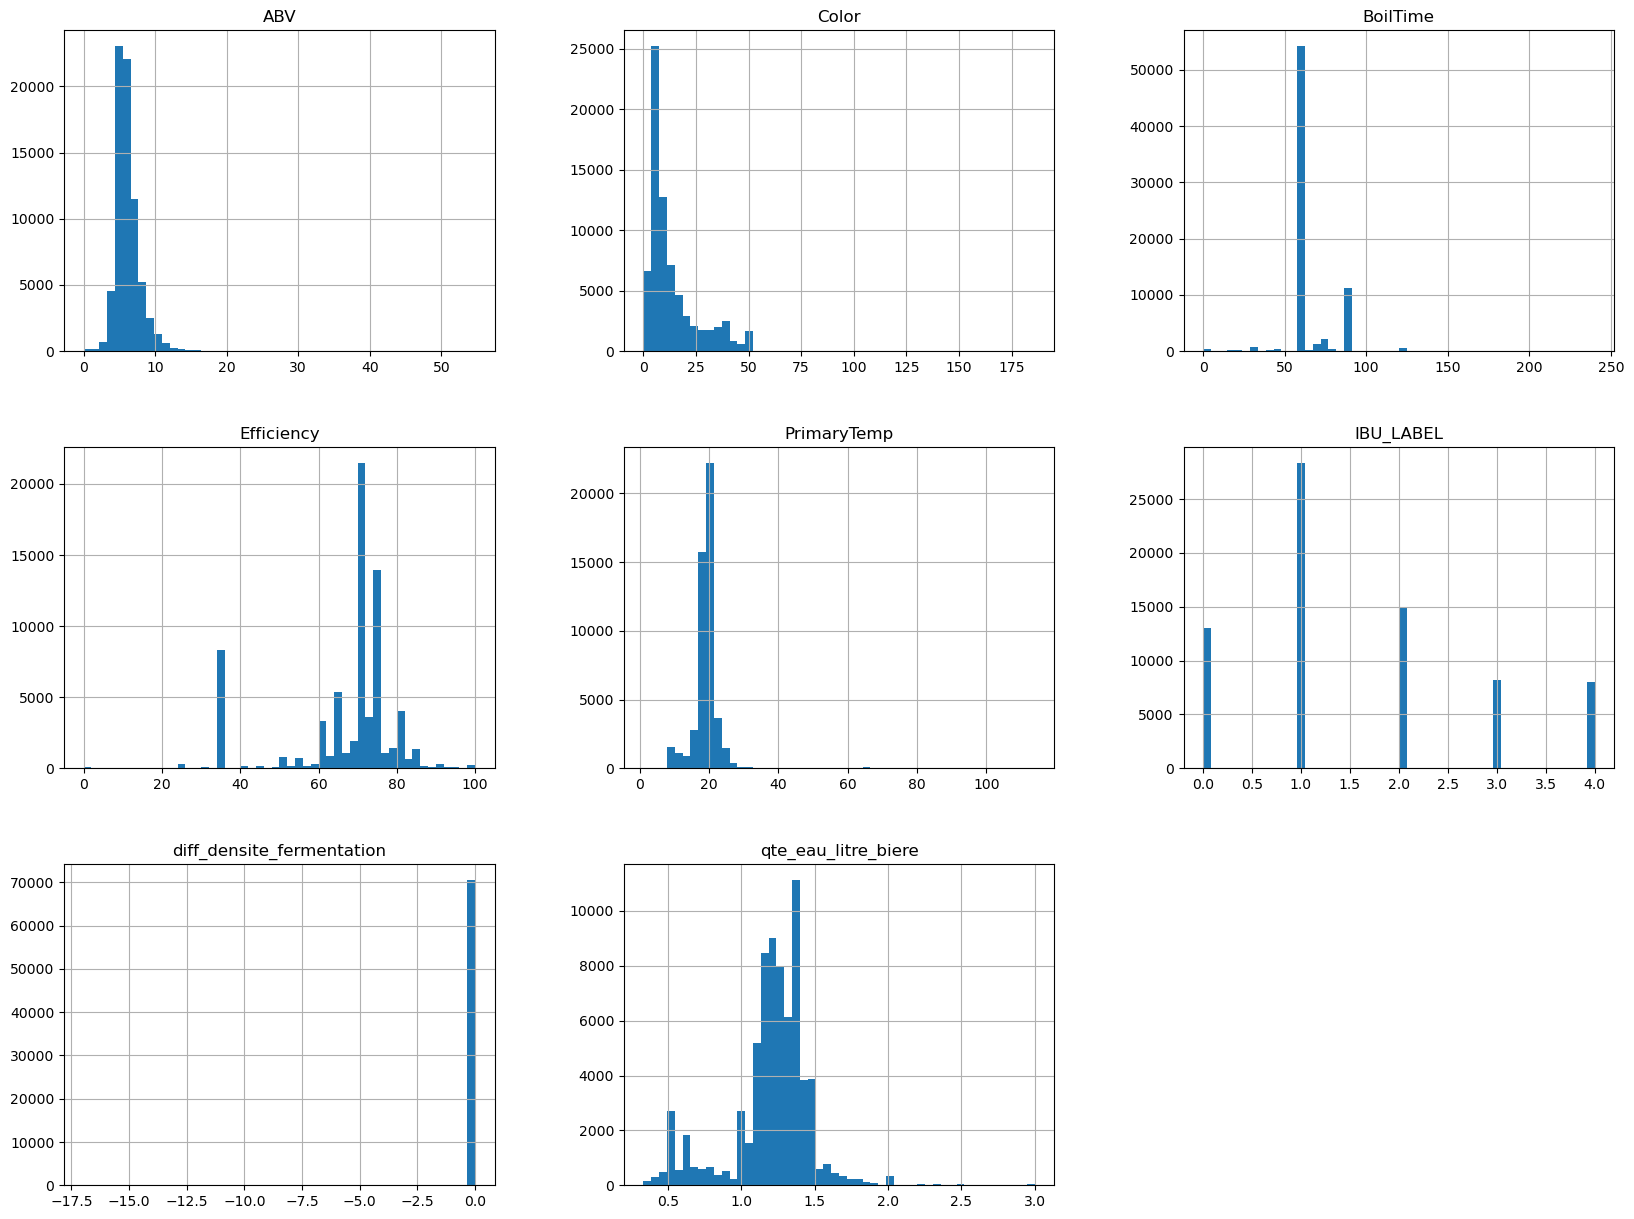

In [491]:
# Visualisations sous la forme d'histogrammes
df_num = df.select_dtypes(include=["int32", "int64", "float64"])
df_num.hist(bins=50, figsize=(20, 15))

plt.show()

In [492]:
df["IBU_LABEL"].value_counts()

1    28376
2    14882
0    12993
3     8196
4     7972
Name: IBU_LABEL, dtype: int64

Nos classes sont déséquilibrées, nous le prendrons en compte lors de l'entrainement des modèles.

In [503]:
df.head()

,Style,ABV,Color,BoilTime,Efficiency,SugarScale,BrewMethod,PrimaryTemp,IBU_LABEL,diff_densite_fermentation,qte_eau_litre_biere
0,cream ale,5.48,4.83,75,70.0,Specific Gravity,All Grain,17.78,0,-0.042,1.304088
1,holiday/winter special spiced beer,8.16,15.64,60,70.0,Specific Gravity,All Grain,NaN,3,-0.062,1.182037
2,american ipa,5.91,8.98,60,70.0,Specific Gravity,extract,NaN,2,-0.045,1.199683
3,american ipa,5.80,8.50,60,70.0,Specific Gravity,All Grain,NaN,2,-0.044,1.166887
4,belgian blond ale,6.48,4.57,90,72.0,Specific Gravity,All Grain,19.00,0,-0.050,1.200000


<Figure size 2000x1500 with 0 Axes>

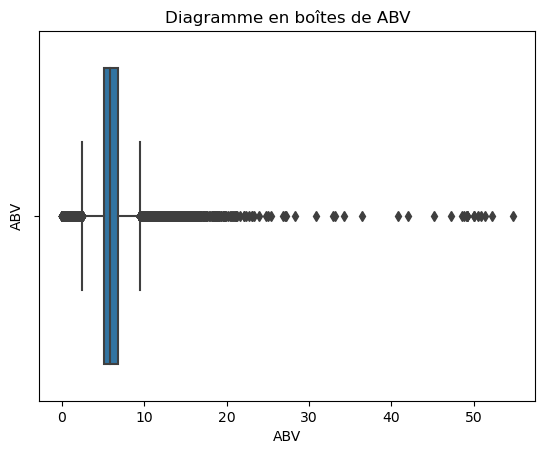

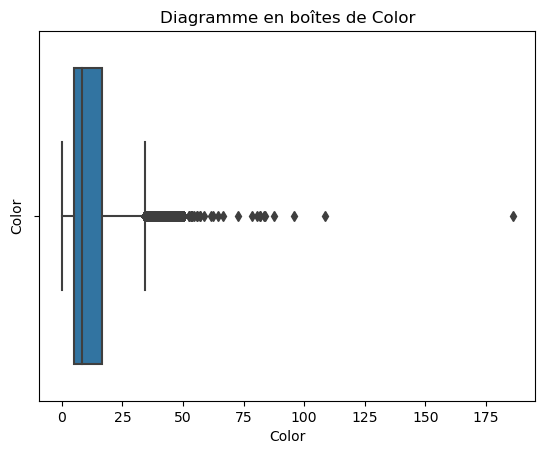

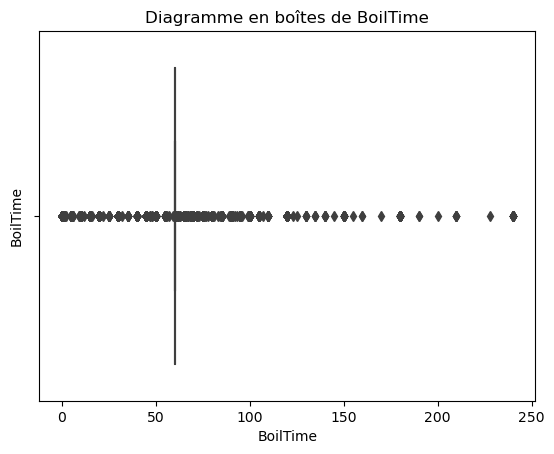

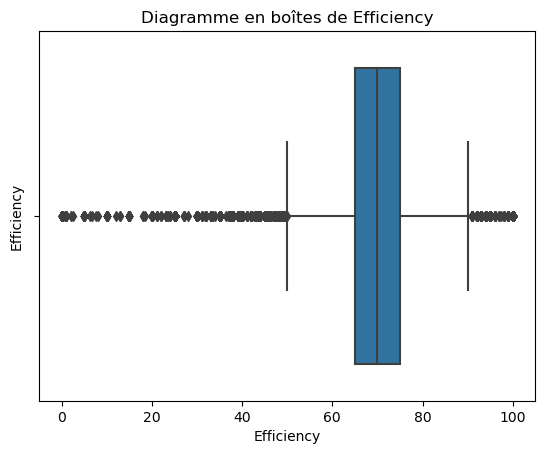

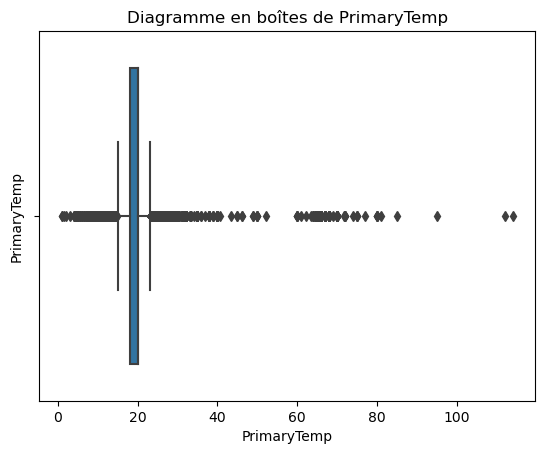

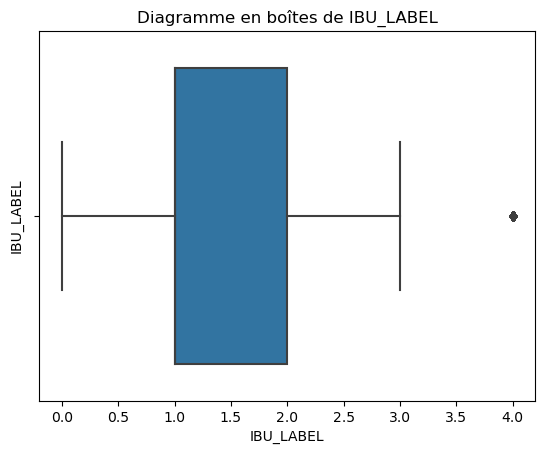

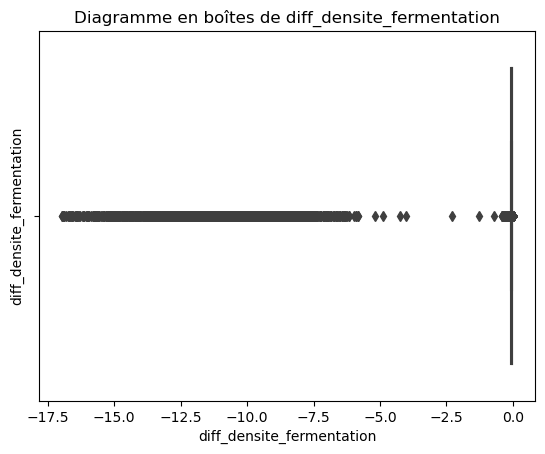

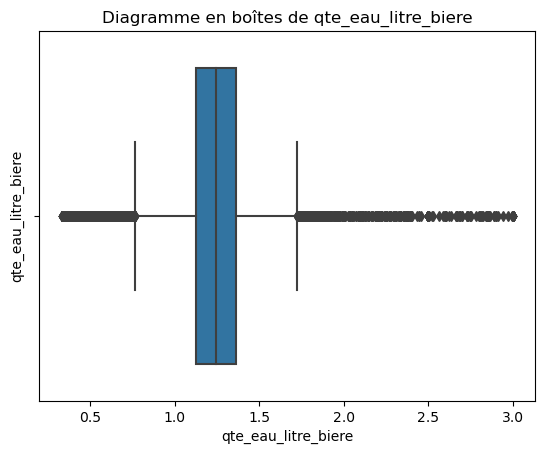

In [504]:
# Sous la forme de boîtes à moustaches

plt.figure(figsize=(20, 15))

for col in df_num.columns:
    plt.figure()
    sns.boxplot(data=df_num, x=col, orient="h")
    plt.title(f"Diagramme en boîtes de {col}")
    plt.ylabel(col)
    plt.show()

In [505]:
# Traitement des outliers de la variable 'color'

df = df[df["Color"] <= 90]

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_14376\1182214259.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap= "coolwarm")


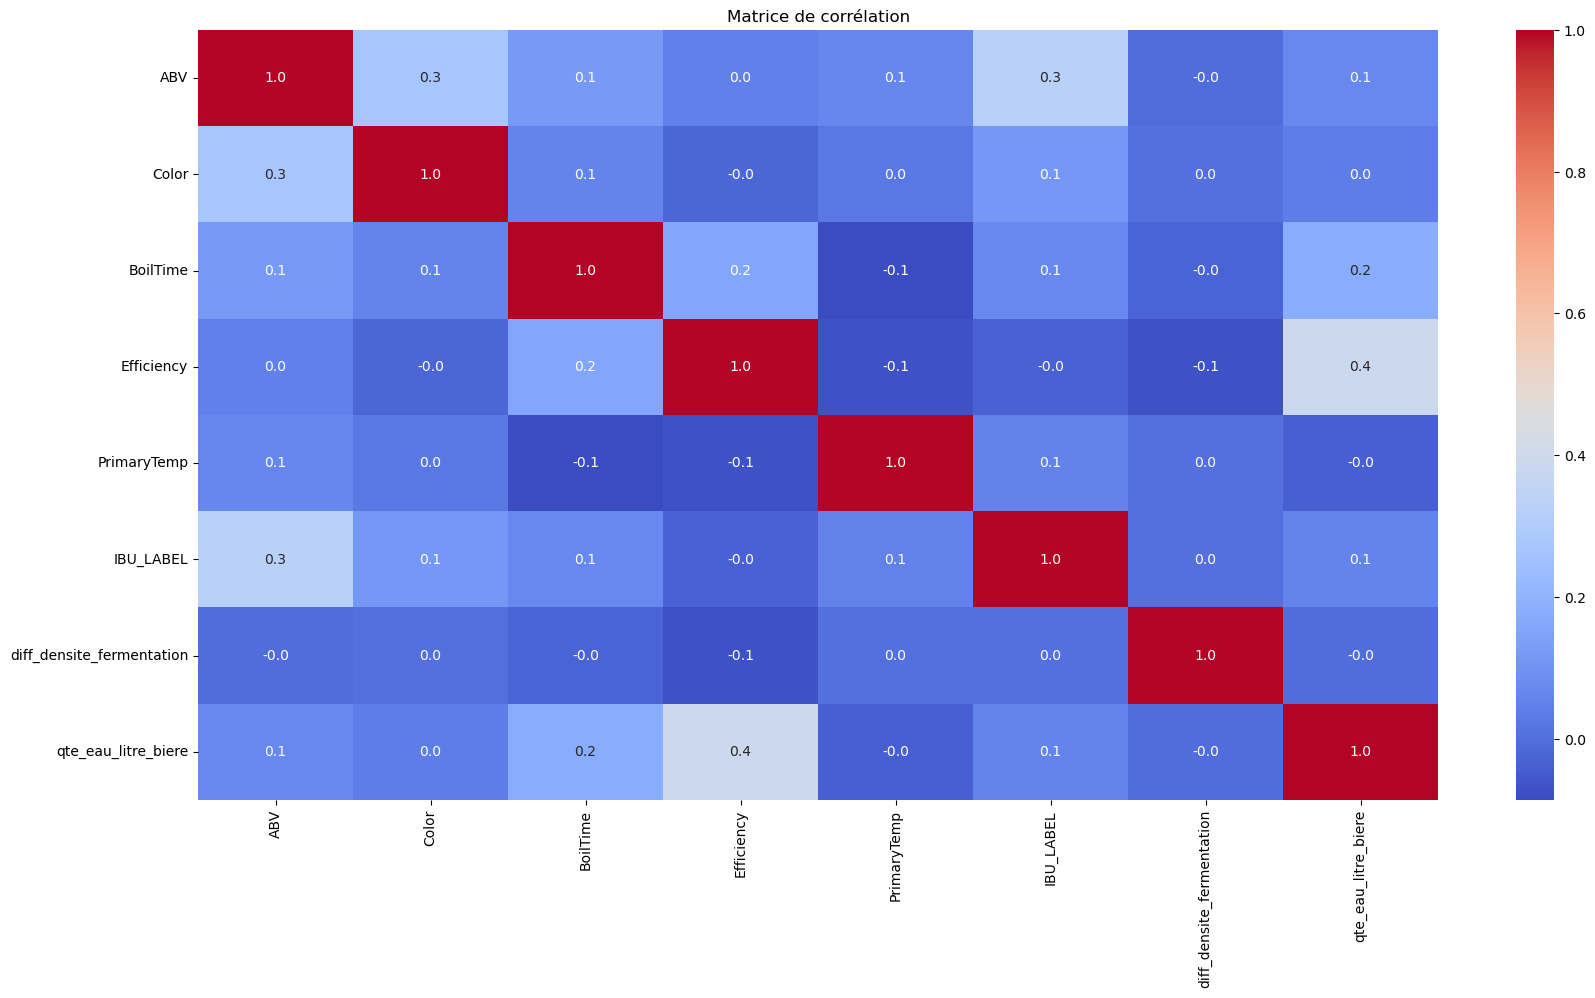

In [506]:
# Matrice de corrélations post Feature-Engineering


plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="coolwarm")

plt.title("Matrice de corrélation")
plt.show()

In [507]:
df.corr()["IBU_LABEL"].sort_values(ascending=False)

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_14376\1484373960.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['IBU_LABEL'].sort_values(ascending=False)


IBU_LABEL                    1.000000
ABV                          0.324529
Color                        0.112136
BoilTime                     0.067496
qte_eau_litre_biere          0.054248
PrimaryTemp                  0.052927
diff_densite_fermentation    0.003382
Efficiency                  -0.034568
Name: IBU_LABEL, dtype: float64

In [508]:
df.corr()["ABV"].sort_values(ascending=False)

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_14376\1086308598.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['ABV'].sort_values(ascending=False)


ABV                          1.000000
IBU_LABEL                    0.324529
Color                        0.269180
BoilTime                     0.119327
qte_eau_litre_biere          0.067683
PrimaryTemp                  0.064974
Efficiency                   0.046777
diff_densite_fermentation   -0.002405
Name: ABV, dtype: float64

L'analyse des corrélations est satisfaisante, nous allons pouvoir passer à l'export de notre jeu de données pour la phase de preprocessing

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72416 entries, 0 to 72896
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Style                      72416 non-null  object 
 1   ABV                        72416 non-null  float64
 2   Color                      72416 non-null  float64
 3   BoilTime                   72416 non-null  int64  
 4   Efficiency                 72416 non-null  float64
 5   SugarScale                 72416 non-null  object 
 6   BrewMethod                 72416 non-null  object 
 7   PrimaryTemp                50351 non-null  float64
 8   IBU_LABEL                  72416 non-null  int32  
 9   diff_densite_fermentation  72416 non-null  float64
 10  qte_eau_litre_biere        72416 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(3)
memory usage: 6.4+ MB


# Export du jeu de données au format .csv

In [510]:
df.to_csv("recettes_propre.csv", index=False)

In [498]:
df.shape

(72419, 11)

In [499]:
df[df["PrimaryTemp"].isnull()]["Style"].value_counts()

american ipa                          3265
american pale ale                     2162
american light lager                  1443
saison                                 767
american amber ale                     616
california common beer                 597
blonde ale                             490
american stout                         406
imperial ipa                           392
american brown ale                     369
irish red ale                          353
oatmeal stout                          317
sweet stout                            315
robust porter                          300
witbier                                299
russian imperial stout                 277
weizen/weissbier                       264
american porter                        237
cream ale                              228
english ipa                            226
american wheat or rye beer             224
double ipa                             222
weissbier                              222
imperial st

In [500]:
df["SugarScale"].value_counts()

Specific Gravity    70622
Plato                1797
Name: SugarScale, dtype: int64

In [501]:
df[df["SugarScale"] == "Plato"]

,Style,ABV,Color,BoilTime,Efficiency,SugarScale,BrewMethod,PrimaryTemp,IBU_LABEL,diff_densite_fermentation,qte_eau_litre_biere
37,american ipa,5.65,4.96,90,75.0,Plato,All Grain,18.00,1,-10.47650,1.195652
269,american ipa,6.11,8.08,90,68.0,Plato,All Grain,18.89,4,-11.28959,1.363593
270,brown porter,5.15,22.65,75,80.0,Plato,All Grain,19.00,1,-9.57668,1.238095
414,old ale,6.70,17.08,90,70.0,Plato,All Grain,20.00,4,-12.27898,1.250110
415,american ipa,5.94,6.66,60,70.0,Plato,All Grain,NaN,3,-10.92909,1.363593
...,...,...,...,...,...,...,...,...,...,...,...
72630,belgian blond ale,6.54,5.94,70,75.0,Plato,All Grain,20.00,1,-12.04599,1.153846
72631,american ipa,6.16,7.83,60,65.0,Plato,All Grain,20.00,2,-11.42655,1.470588
72652,american light lager,5.32,5.95,60,35.0,Plato,All Grain,NaN,0,-9.89245,1.250000
72734,american ipa,6.58,4.27,60,78.0,Plato,All Grain,NaN,2,-12.17654,1.150943


In [502]:
df[df["SugarScale"] == "Specific Gravity"]

,Style,ABV,Color,BoilTime,Efficiency,SugarScale,BrewMethod,PrimaryTemp,IBU_LABEL,diff_densite_fermentation,qte_eau_litre_biere
0,cream ale,5.48,4.83,75,70.0,Specific Gravity,All Grain,17.78,0,-0.042,1.304088
1,holiday/winter special spiced beer,8.16,15.64,60,70.0,Specific Gravity,All Grain,NaN,3,-0.062,1.182037
2,american ipa,5.91,8.98,60,70.0,Specific Gravity,extract,NaN,2,-0.045,1.199683
3,american ipa,5.80,8.50,60,70.0,Specific Gravity,All Grain,NaN,2,-0.044,1.166887
4,belgian blond ale,6.48,4.57,90,72.0,Specific Gravity,All Grain,19.00,0,-0.050,1.200000
...,...,...,...,...,...,...,...,...,...,...,...
72892,american ipa,6.71,4.73,30,55.0,Specific Gravity,Partial Mash,NaN,2,-0.051,0.666667
72893,british strong ale,5.22,6.96,60,63.0,Specific Gravity,All Grain,20.00,1,-0.040,0.857143
72894,specialty ipa: rye ipa,6.37,7.90,60,60.0,Specific Gravity,BIAB,22.00,2,-0.049,1.700000
72895,irish red ale,4.82,14.12,60,72.0,Specific Gravity,All Grain,18.00,1,-0.037,1.166667
